In [1]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy as sp
import sklearn as sk

In [30]:
STOCK_NAMES = ['AAPL','MSFT','AMZN','GOOG','BRKB',
              'FB','JNJ','JPM','XOM','V','WMT','BAC',
              'UNH','PFE','WFC','VZ','PG','CVX','T',
              'INTC','CSCO','HD','MA','KO','BA',
              'MRK','ORCL','DIS','CMCSA','PEP','C',
              'MCD','PM','DWDP','ABBV','NFLX','MDT',
              'ABT','NVDA','AMGN','NKE','ADBE','MO','LLY',
              'MMM','IBM','HON','UNP','ACN',
              'UTX']

PROJECT_PATH = '/pine/scr/s/i/siyangj/DeepStock/FinalProject/'
DATA_PATH = os.path.join(PROJECT_PATH,'Data/')

VOLUME_NORMALIZATION_ID = 'VOLUME_NORMALIZATION'

DATA_1 = os.path.join(DATA_PATH,'preprocessed_1.h5')
DATA_ID = 'DATA_PREPROCESSED_1'

DATA_HDF5 = os.path.join(DATA_PATH,'clean.h5')
DATA_HDF5_ID = 'CLEAN_DATA'

NUM_DAYS = 5
NUM_PER_DAY = 389
NUM_STOCKS = 50
NUM_PER_STOCK = 5

In [2]:
sys.argv=['/usr/bin/python',]

In [3]:
import config
import main
import train
import generator
import test

In [4]:
X_test, Y_test, pred = test.test()

saver restore from:/pine/scr/s/i/siyangj/DeepStock/FinalProject/Model/Building/ckpt/snapshot_10000
INFO:tensorflow:Restoring parameters from /pine/scr/s/i/siyangj/DeepStock/FinalProject/Model/Building/ckpt/snapshot_10000
>> begin predicting for each patch
Predict complete, cost [ 10] seconds


In [9]:
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)
pred.shape

(20, 1, 388, 50)

In [10]:
X_test.shape

(20, 1, 388, 250)

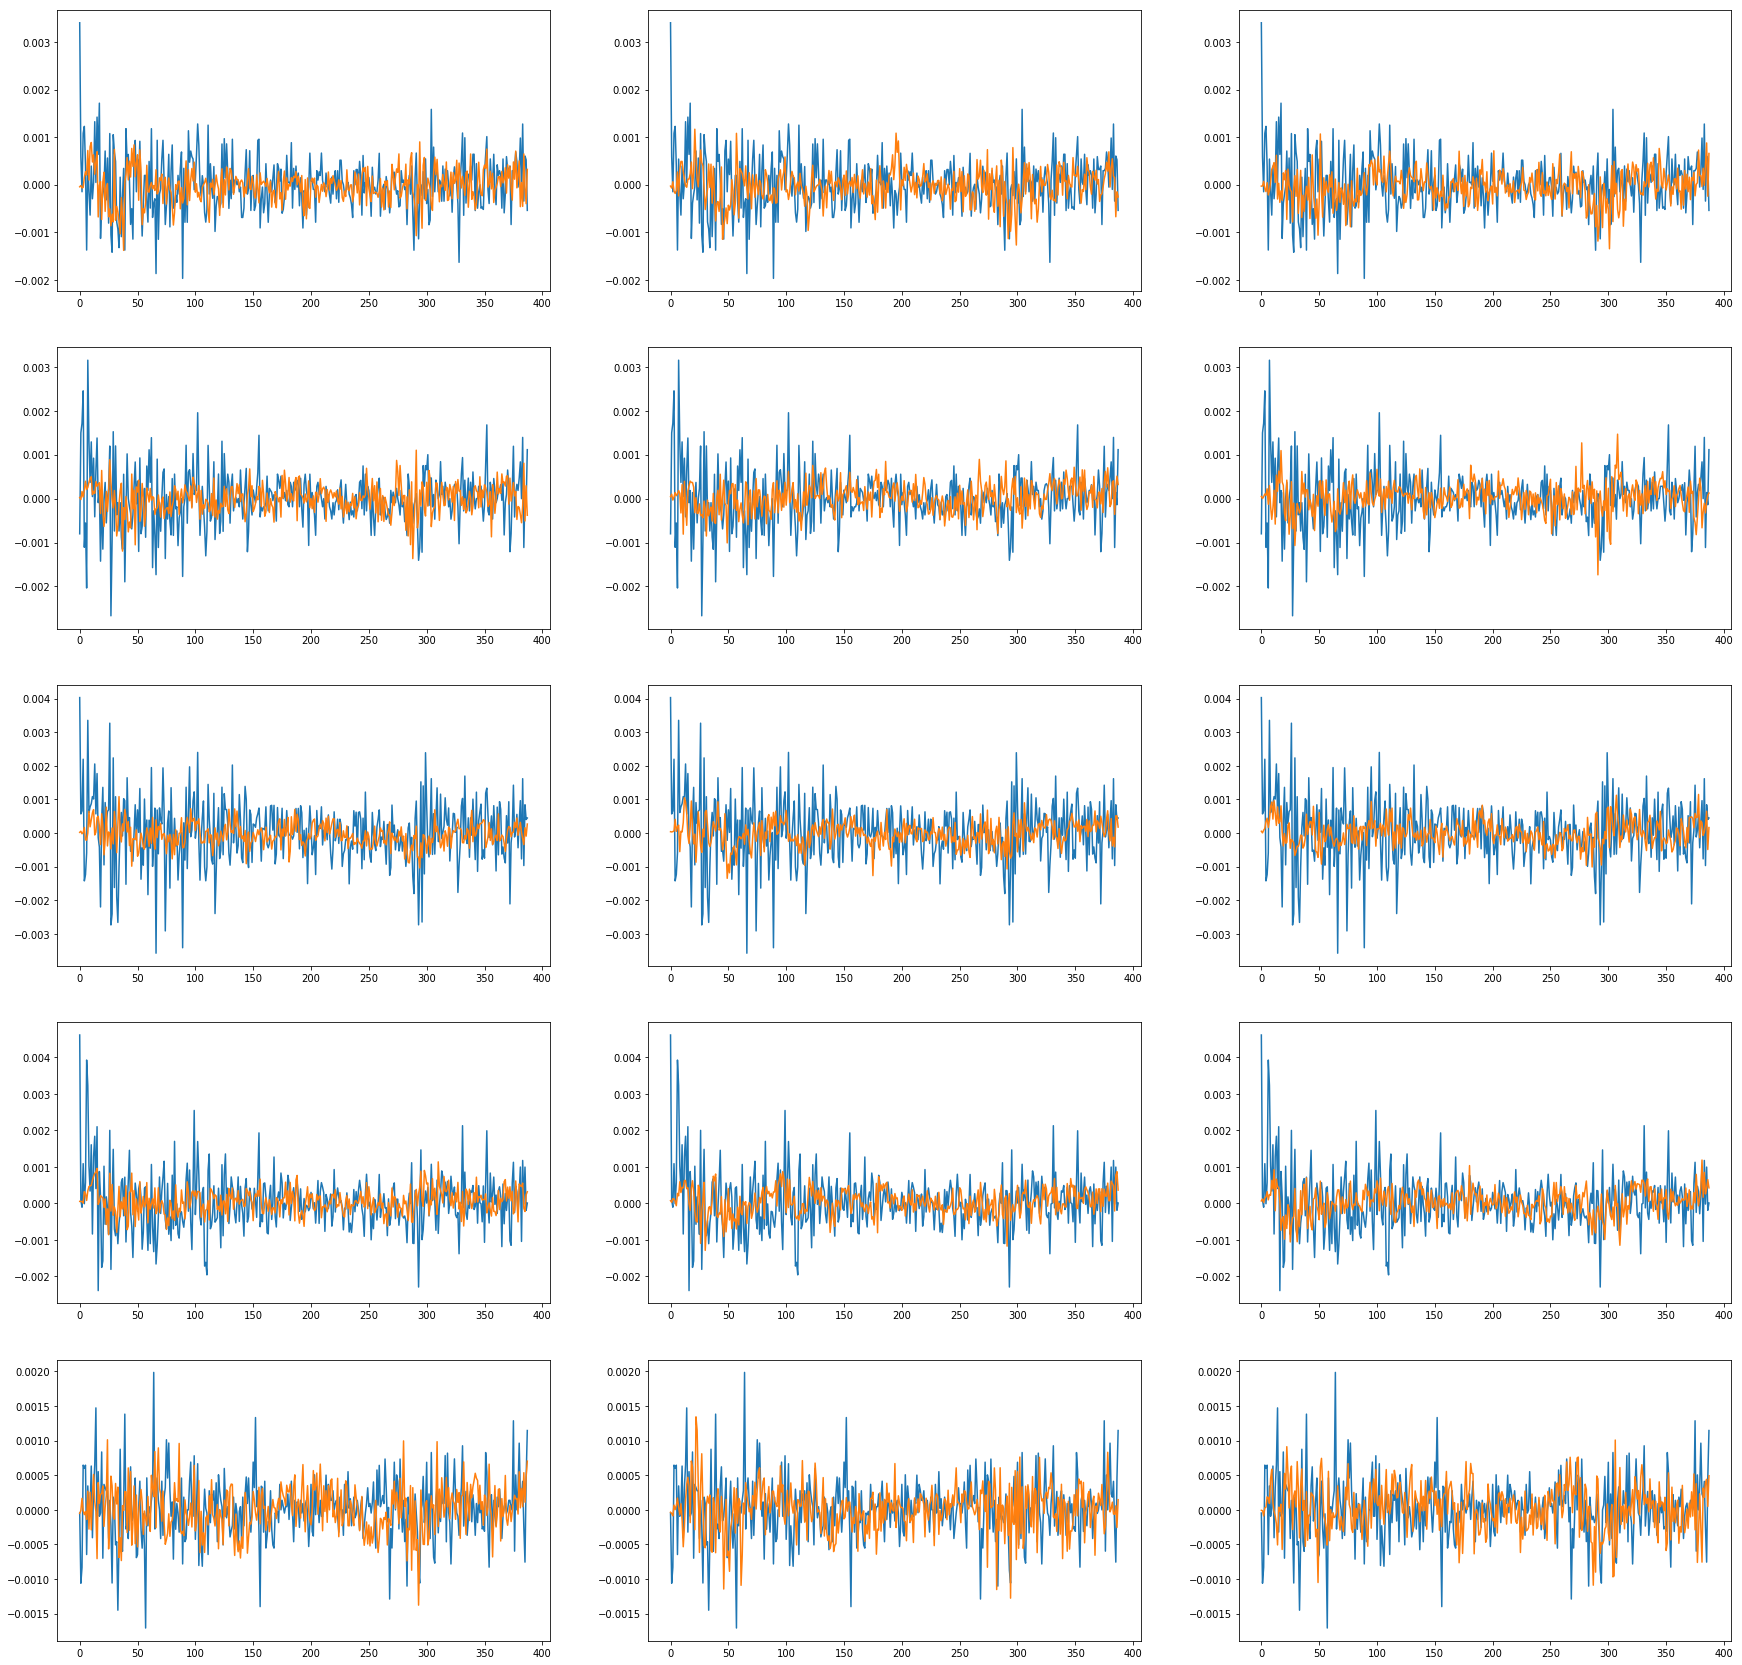

In [15]:
f, axes = plt.subplots(5,3,figsize=(30,30))
for i in range(5):
    for j in range(3):
        axes[i][j].plot(Y_test[j,0,:,i])
        axes[i][j].plot(pred[j,0,:,i])

In [16]:
X = X_test[0,0,:,:]
Y = Y_test[0,0,:,:]
P = pred[0,0,:,:]

In [17]:
trend_error_mask = Y*P<0

In [26]:
trend_error_mask.mean(axis=0)

array([0.46391753, 0.46907216, 0.4742268 , 0.46134021, 0.47164948,
       0.46391753, 0.4742268 , 0.42010309, 0.46649485, 0.43814433,
       0.51030928, 0.43041237, 0.48453608, 0.44072165, 0.40463918,
       0.47938144, 0.45876289, 0.45618557, 0.40979381, 0.46134021,
       0.39690722, 0.43814433, 0.47164948, 0.38917526, 0.44329897,
       0.44329897, 0.42268041, 0.50257732, 0.47680412, 0.44072165,
       0.46134021, 0.45103093, 0.46134021, 0.44329897, 0.43556701,
       0.45360825, 0.45876289, 0.46134021, 0.4742268 , 0.47938144,
       0.5       , 0.4742268 , 0.40721649, 0.47680412, 0.48969072,
       0.44072165, 0.48453608, 0.47680412, 0.44072165, 0.40979381])

In [28]:
m1 = trend_error_mask.mean(axis=1)

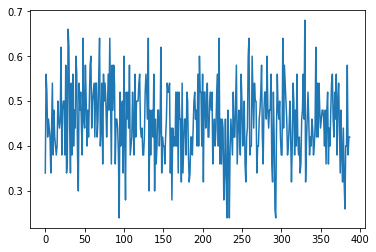

In [29]:
plt.plot(m1)

In [32]:
df_price = pd.read_hdf(DATA_HDF5,DATA_HDF5_ID)

In [33]:
df_price.shape

(1950, 250)

In [44]:
X_index = [i for i in range(1950) if i%390!=0 and i%390!=389]
Y_index = [i for i in range(1950) if i%390!=0 and i%390!=1]

In [49]:
X_close = df_price.iloc[1:389,3]
Y_close = df_price.iloc[2:390,3]

In [50]:
X_close.shape

(388,)

In [53]:
X_pred = X_close * (1+P[:,0])

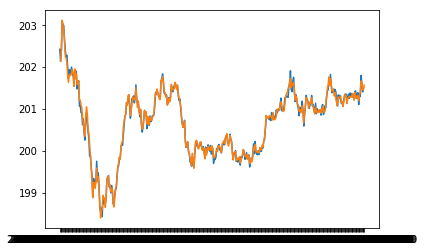

In [54]:
plt.figure()
plt.plot(X_pred)
plt.plot(Y_close)
plt.show()

In [34]:
trend_error_mask.shape

(388, 50)

In [ ]:
trend_error_mask[194:,:].mean()

In [8]:
from importlib import reload

reload(model)
tf.reset_default_graph()

In [4]:
main.main()

training: global variable initialization...
[ Thu Nov 15 01:18:25 2018], iter [  10], Lr[0.00010000] ,loss[0.0000601382]
[ Thu Nov 15 01:18:25 2018], validation: iter [  10], loss[0.0001169851]
[ Thu Nov 15 01:18:40 2018], iter [  20], Lr[0.00010000] ,loss[0.0000516402]
[ Thu Nov 15 01:18:40 2018], validation: iter [  20], loss[0.0000765108]


KeyboardInterrupt: 

In [9]:
(X_variable, Y_variable,
            pred, loss, final_loss,
            gene_vars)=model.create_model()

In [10]:
Y_variable

<tf.Tensor 'Y_placeholder:0' shape=(1, 388, 50) dtype=float32>

In [11]:
tf.trainable_variables()

[<tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0' shape=(2940, 4000) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0' shape=(4000,) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/kernel:0' shape=(2000, 4000) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/bias:0' shape=(4000,) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_2/basic_lstm_cell/kernel:0' shape=(2000, 4000) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_2/basic_lstm_cell/bias:0' shape=(4000,) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_3/basic_lstm_cell/kernel:0' shape=(2000, 4000) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_3/basic_lstm_cell/bias:0' shape=(4000,) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_4/basic_lstm_cell/kernel:0' shape

In [34]:
tf.trainable_variables()

[<tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0' shape=(2940, 4000) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0' shape=(4000,) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/kernel:0' shape=(2000, 4000) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/bias:0' shape=(4000,) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_2/basic_lstm_cell/kernel:0' shape=(2000, 4000) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_2/basic_lstm_cell/bias:0' shape=(4000,) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_3/basic_lstm_cell/kernel:0' shape=(2000, 4000) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_3/basic_lstm_cell/bias:0' shape=(4000,) dtype=float32_ref>,
 <tf.Variable 'lstm_layers/rnn/multi_rnn_cell/cell_4/basic_lstm_cell/kernel:0' shape

In [27]:
train_minimize, learning_rate, global_step = model.create_optimizers(final_loss)

In [25]:
i = np.random.randint(0,3,2)

In [27]:
A = np.random.rand(3,4,5)

In [28]:
A

array([[[0.8011633 , 0.40827603, 0.34764643, 0.2461037 , 0.59265916],
        [0.15609878, 0.61869771, 0.21518666, 0.93769842, 0.30772747],
        [0.67167343, 0.60297006, 0.40859951, 0.7810718 , 0.19819816],
        [0.83006654, 0.55371466, 0.24797447, 0.13798464, 0.61718568]],

       [[0.01368692, 0.67943672, 0.49979808, 0.01238002, 0.15808463],
        [0.64595762, 0.13259965, 0.25015171, 0.36347717, 0.68912922],
        [0.89498841, 0.83876861, 0.11431609, 0.69845196, 0.3052073 ],
        [0.79868694, 0.60994677, 0.06736166, 0.49375642, 0.19873937]],

       [[0.86081116, 0.55826739, 0.78840203, 0.26252824, 0.77843724],
        [0.13790114, 0.94303046, 0.89952717, 0.39171198, 0.77424706],
        [0.79907697, 0.68156463, 0.80357031, 0.15150734, 0.42173673],
        [0.92775495, 0.2394659 , 0.97143321, 0.30619699, 0.34379555]]])

In [34]:
A[[1,1,1],[2,2,2],:]

array([[0.89498841, 0.83876861, 0.11431609, 0.69845196, 0.3052073 ],
       [0.89498841, 0.83876861, 0.11431609, 0.69845196, 0.3052073 ],
       [0.89498841, 0.83876861, 0.11431609, 0.69845196, 0.3052073 ]])

In [3]:
import generator

In [4]:
g1,g2 = generator.get_training_and_testing_generators()

In [12]:
x,y=next(g1)
print(x.shape,y.shape)

(1, 60, 250) (1, 60, 50)
